# SVD Image compression

Some background information on 

This notebook shows low rank approximation of an image with SVD

References:

1. [SVD/PCA and image compression](http://math.arizona.edu/~brio/VIGRE/ThursdayTalk.pdf).
2. James W. Demmel Applied Numerical Linear Algebra, Chapter 3.2.3

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# RGB to Gray conversion
# https://en.wikipedia.org/wiki/Grayscale#Luma_coding_big_gameas
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [3]:
img_rgb = plt.imread('./images/wine_barrels.jpg')

We convert the image to gray scale just to make the problem a bit simpler. To compress RGB image you need to calculate SVD for R, G and B separately.

In [4]:
img_gray = rgb2gray(img_rgb)    

In [5]:
U, s, V = np.linalg.svd(img_gray, full_matrices=False)

In [6]:
rank = np.linalg.matrix_rank(img_gray, tol=None)
rank

428

Define desired rank. Smaller rank will compress the image better, but the quility will be worse.

In [7]:
approx_rank = 25

In [8]:
compress_ratio = approx_rank * (img_gray.shape[0] + img_gray.shape[1]) / (img_gray.shape[0] * img_gray.shape[1])
compress_ratio

0.09747371495327103

The compression can be achieved by discarding some of the singular values (low rank matrix), we take ${approx\_rank}$ first singular values of matrix ${\Sigma}$ and then calculate the best image approximation, in the sense of minimazing norm ${||A - A_{approx\_rank}||_2 = \sigma_{approx\_rank+1}}$ , ${A = U \Sigma_{approx\_rank} V^T}$

In [9]:
real_img = np.dot(U, np.dot(np.diag(s), V))
S = np.diag(s)
approx_img = np.dot(
    U[:, 0:approx_rank],
        np.dot(
            S[0:approx_rank, 0:approx_rank],
            V[0:approx_rank, :]))

Text(0.5, 0, 'Real image rank: 428')

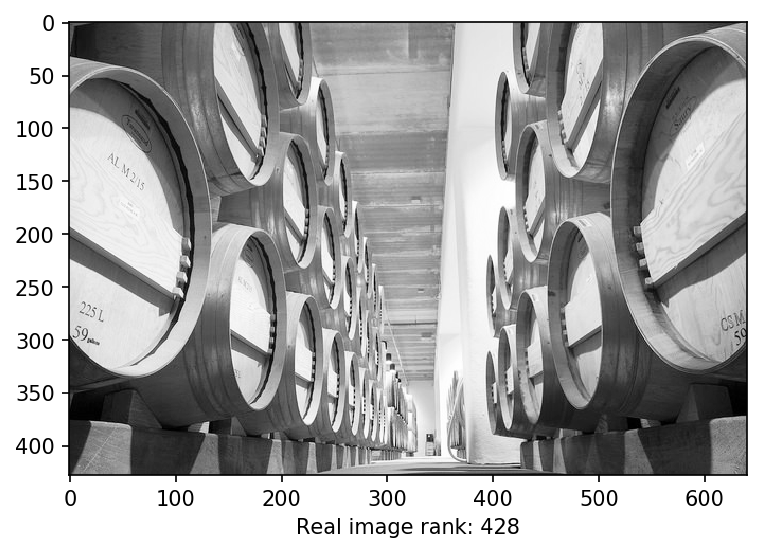

In [10]:
plt.rcParams['figure.dpi'] = 150
plt.imshow(real_img, cmap=cm.Greys_r)
plt.xlabel('Real image rank: ' + str(rank))

Text(0.5, 0, 'Approx rank: 25 compression: 0.0975')

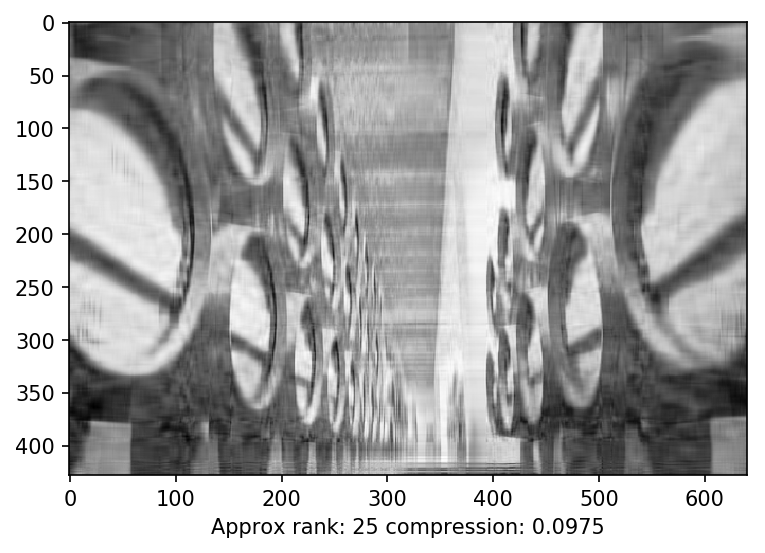

In [11]:
plt.imshow(approx_img, cmap=cm.Greys_r)
plt.xlabel('Approx rank: {:} compression: {:2.4f}'.format(approx_rank, compress_ratio))